# Random Forest Classifier 
* Grid search to find best parameters
* Cross validation
* Parameter-CV accuary plotting

In [62]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import warnings
import src.Utils as utils
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

# environment settings
data_path = 'Data/'

#hack to avoid showing deprecationg warnings
warnings.filterwarnings('ignore')

# Deserialize previously saved data from "preprocessing"
with open(data_path+'train_pp.obj', 'rb') as train_pp, \
open(data_path+'test_pp.obj','rb') as test_pp:
    train_df = pickle.load(train_pp)
    test_df = pickle.load(test_pp)

In [63]:
#Separate training set from target variables
X,y = utils.train_test_separator(train_df)
#Create training set and test set with split 0.2
X_train , X_test ,y_train,y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y)

#Clean test_set
test_set = test_df
test_set=test_set.drop(['Name'], axis=1)

In [64]:
# # Grid search to find best parameter values
# param_grid = {'n_estimators':[10,20,50,100,150],'max_features':[5,6,7],'max_depth':[5,7,9]}
# grid_rf = GridSearchCV(ske.RandomForestClassifier(n_jobs=-1),param_grid=param_grid,cv=10,scoring='accuracy')
# grid_rf.fit(X,y)
# print(grid_rf.best_score_)
# print(grid_rf.best_params_)

In [65]:
import sklearn.ensemble as ske
#Kfold cross-validation with 10 folds
kfold = StratifiedKFold(n_splits=10, random_state=1).split(X,y)

#Initialization of Random Forest Classifier
rf = ske.RandomForestClassifier(n_estimators=50,
                                max_features=2,
                                criterion='gini',
                                max_depth=7,
                                bootstrap=True)

#Cross-validation score saved in scores array
scores= []
for k,(train,test) in enumerate(kfold):
    rf.fit(X[train], y[train])
    rf_train_score = rf.score(X[test],y[test])
    scores.append(rf_train_score)
print("\nCV accuracy : {} +/- {}".format(np.mean(scores),np.std(scores)))
rf.fit(X_train,y_train)
rf_test_score=rf.score(X_test,y_test)
print("Random Forest test accuracies {}".format(rf_test_score))


CV accuracy : 0.8215809783225513 +/- 0.03008569632364406
Random Forest test accuracies 0.8059701492537313


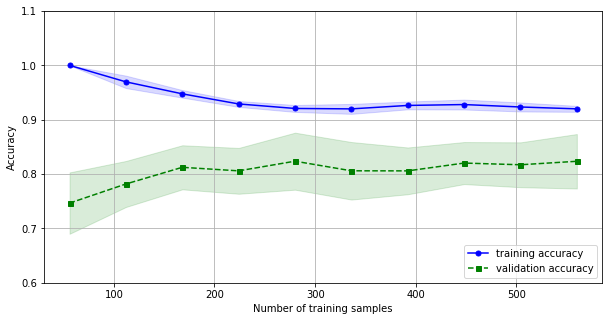

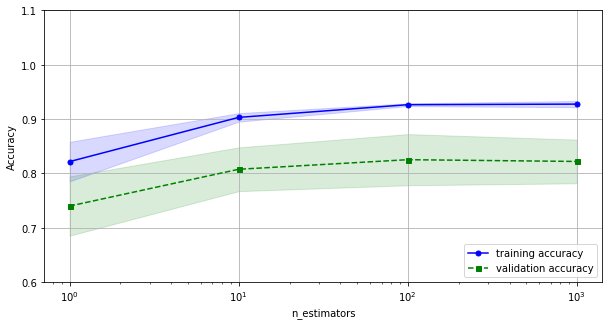

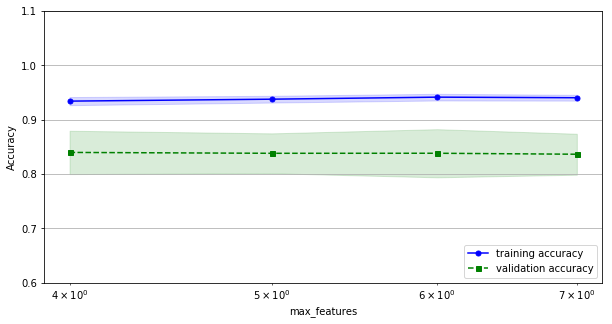

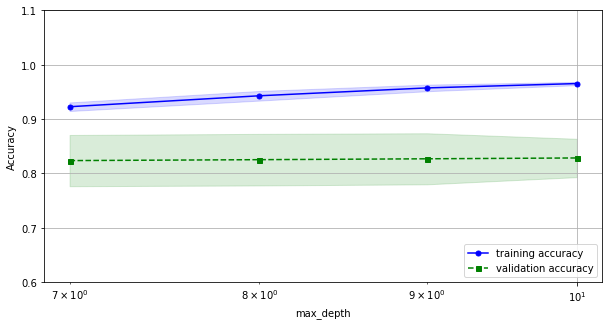

In [66]:
#Plotting graphs
plot_params = {
    'classifier': rf,
    'X_train': X_train,
    'y_train': y_train
}

utils.plot_cv_accuracy(**plot_params)
utils.plot_cv_parameters(**plot_params,
                        param='n_estimators',
                        param_range=[1,10,100,1000])
utils.plot_cv_parameters(**plot_params,
                         param='max_features',
                         param_range=[4,5,6,7])
utils.plot_cv_parameters(**plot_params,
                         param='max_depth',
                         param_range=[7,8,9,10])

#The graphs show grafically what the grid search found.

In [69]:
#train_df=train_df.drop(['Survived','Name'], axis=1)
feat_lables = train_df.columns[0:]
rf.fit(X,y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%2d %-*s %f" %(f+1,30,feat_lables[indices[f]],importances[indices[f]]))

 1 Sex                            0.369100
 2 Fare                           0.158805
 3 Pclass                         0.137418
 4 Age                            0.117892
 5 PassengerId                    0.099079
 6 SibSp                          0.046255
 7 Parch                          0.037153
 8 Embarked_S                     0.022920
 9 Embarked_Q                     0.011378


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.2,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8022388059701493

In [70]:
#Prediction on real test set using random forest
rf.fit(X,y)
survival_results =rf.predict(test_set)
result_df = pd.DataFrame(data={'PassengerId': test_df['PassengerId'].values,
                               'Survived': survival_results})
result_df['Survived'] = [0 if x == False else 1 for x in result_df['Survived']]
#Create output csv file
result_df.to_csv(data_path+"outputs/randomforest_ne_50_maxd_7_maxf_5.csv", index=False)

In [7]:
#TODO :automatic file naming with param values , serialize output for ensamble learning, create plot for feature importancs